---
Exploratory Relevance Analysis
---


**Description:**  
We perform relevance analysis, to get a better understanding of the flow and identify channels and layers which are important

### Additional Comments
We visualize the loss of relevance, distribution of relevance within a layer
### Author: Viswambhar Yasa

### Date: 09-01-2024

**Contact Information:**  
Email: [yasa.viswambhar@gmail.com](mailto:yasa.viswambhar@gmail.com)


In [1]:
import os
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:

notebook_directory = Path().resolve().parent
sys.path.insert(0, str(notebook_directory.parent))
from experiment.helper_functions import load_dict,plot_and_annotate_max_min_index,get_info,generate_layer_heatmap,visualize_layerheatmap

In [181]:
models=["alexnet","vgg16","resnet18"]
saved_path="D:\Thesis\ExplainingWilderness\experiments\wilderness_concepts\experiment\Notebooks\temp\relevance_dict"
filename="_relevance_dict.pkl"

In [182]:
alexnet_rel=load_dict(os.path.join(saved_path,models[0]+filename))
vgg16_rel=load_dict(os.path.join(saved_path,models[1]+filename))
resent18_rel=load_dict(os.path.join(saved_path,models[2]+filename))

In [183]:
alexnet_features=get_info(alexnet_rel)
vgg16_features=get_info(vgg16_rel)
resent18_features=get_info(resent18_rel)

In [184]:
print(alexnet_features.keys())
print(vgg16_features.keys())
print(resent18_features.keys())

dict_keys(['features.0', 'features.3', 'features.6', 'features.8', 'features.10', 'classifier.1', 'classifier.4', 'classifier.6', 'classifier.9', 'classifier.12', 'classifier.15'])
dict_keys(['features.0', 'features.2', 'features.5', 'features.7', 'features.10', 'features.12', 'features.14', 'features.17', 'features.19', 'features.21', 'features.24', 'features.26', 'features.28', 'classifier.0', 'classifier.3', 'classifier.6', 'classifier.9'])
dict_keys(['features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.0.downsample.0', 'features.5.1.conv1', 'features.5.1.conv2', 'features.6.0.conv1', 'features.6.0.conv2', 'features.6.0.downsample.0', 'features.6.1.conv1', 'features.6.1.conv2', 'features.7.0.conv1', 'features.7.0.conv2', 'features.7.0.downsample.0', 'features.7.1.conv1', 'features.7.1.conv2', 'common_layers.0', 'common_layers.3', 'common_layers.6'])


In [185]:
len(alexnet_features["features.10"]['channelmean'])

256

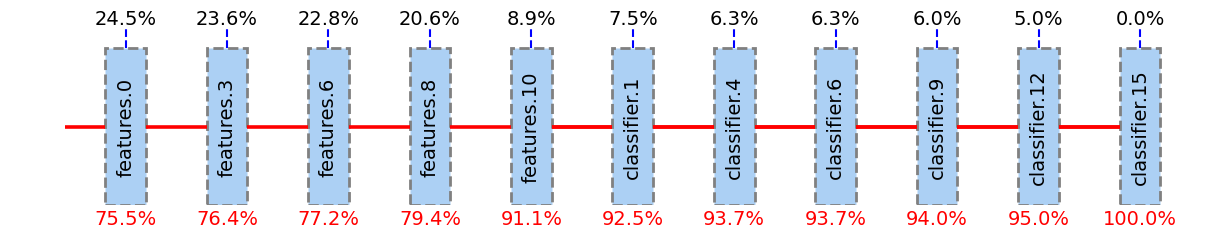

In [186]:
meanvalue={}
for i,value in alexnet_features.items():
    meanvalue[i]=value["meanrel"]*100

from experiment.helper_functions import create_bar_chart

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/alexnet_relevanceflow.png"))

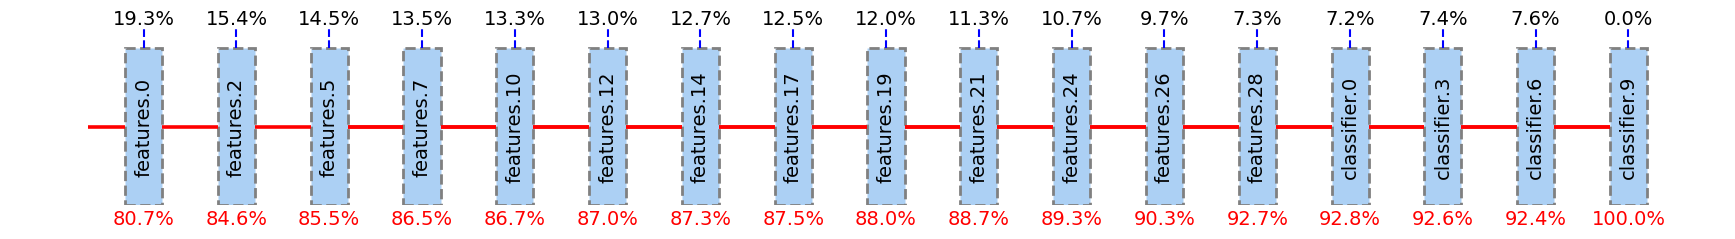

In [187]:
meanvalue={}
for i,value in vgg16_features.items():
    meanvalue[i]=value["meanrel"]*100

from helper_functions import create_bar_chart

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/vgg16_relevanceflow.png"))

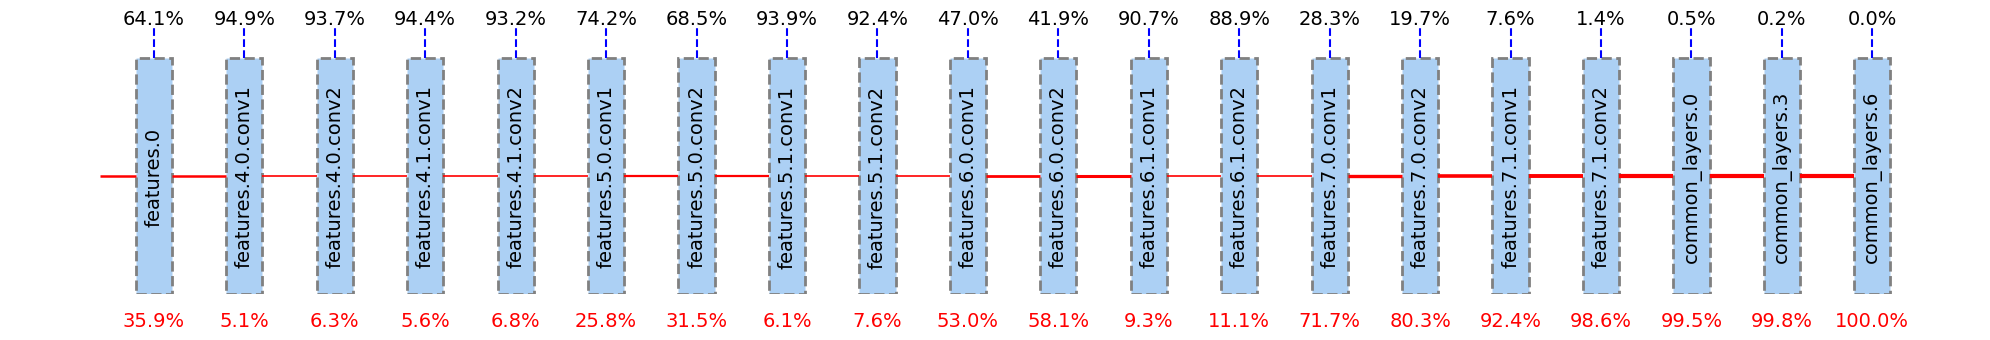

In [190]:
meanvalue={}
index=0
for i,value in resent18_features.items():
    newparts = i.replace('downsample.0', 'down')
    if 'down' not in newparts:
        meanvalue[newparts]=value["meanrel"]*100

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/resnet18_relevanceflow.png"),figheight=3.5)

In [193]:
def plot_and_annotate_max_min_index(original_arr, label, color, marker, reverse=True,maxposition=(0,10),minposition=(0,-15),fontsize=16):
    sorted_arr = sorted(original_arr, reverse=reverse)
    max_value_index = np.argmax(original_arr)  # Index of max value in the original array
    min_value_index = np.argmin(original_arr)  # Index of min value in the original array
    max_value_sorted_index = sorted_arr.index(original_arr[max_value_index])  # Find the index in the sorted array
    min_value_sorted_index = sorted_arr.index(original_arr[min_value_index])  # Find the index in the sorted array

    plt.scatter(np.arange(len(original_arr)), sorted_arr, label=label, color=color, marker=marker)
    plt.scatter(max_value_sorted_index, sorted_arr[max_value_sorted_index], color=color, s=100, edgecolors='black',marker="d")  # Highlight the max index in the sorted array
    plt.scatter(min_value_sorted_index, sorted_arr[min_value_sorted_index], color=color, s=100, edgecolors='black',marker="d")  # Highlight the min index in the sorted array
    
    # Adjust text position based on the index's location
    max_text_offset = maxposition 
    min_text_offset = minposition 

    plt.annotate(f"Max Ch: {max_value_index}", (max_value_sorted_index, sorted_arr[max_value_sorted_index]), textcoords="offset points", xytext=max_text_offset,color=color, ha='center',fontsize=fontsize)
    plt.annotate(f"Min Ch: {min_value_index}", (min_value_sorted_index, sorted_arr[min_value_sorted_index]), textcoords="offset points", xytext=min_text_offset,color=color, ha='center',fontsize=fontsize)


In [204]:
resent18_rel.keys()

dict_keys(['features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.0.downsample.0', 'features.5.1.conv1', 'features.5.1.conv2', 'features.6.0.conv1', 'features.6.0.conv2', 'features.6.0.downsample.0', 'features.6.1.conv1', 'features.6.1.conv2', 'features.7.0.conv1', 'features.7.0.conv2', 'features.7.0.downsample.0', 'features.7.1.conv1', 'features.7.1.conv2', 'common_layers.0', 'common_layers.3', 'common_layers.6'])

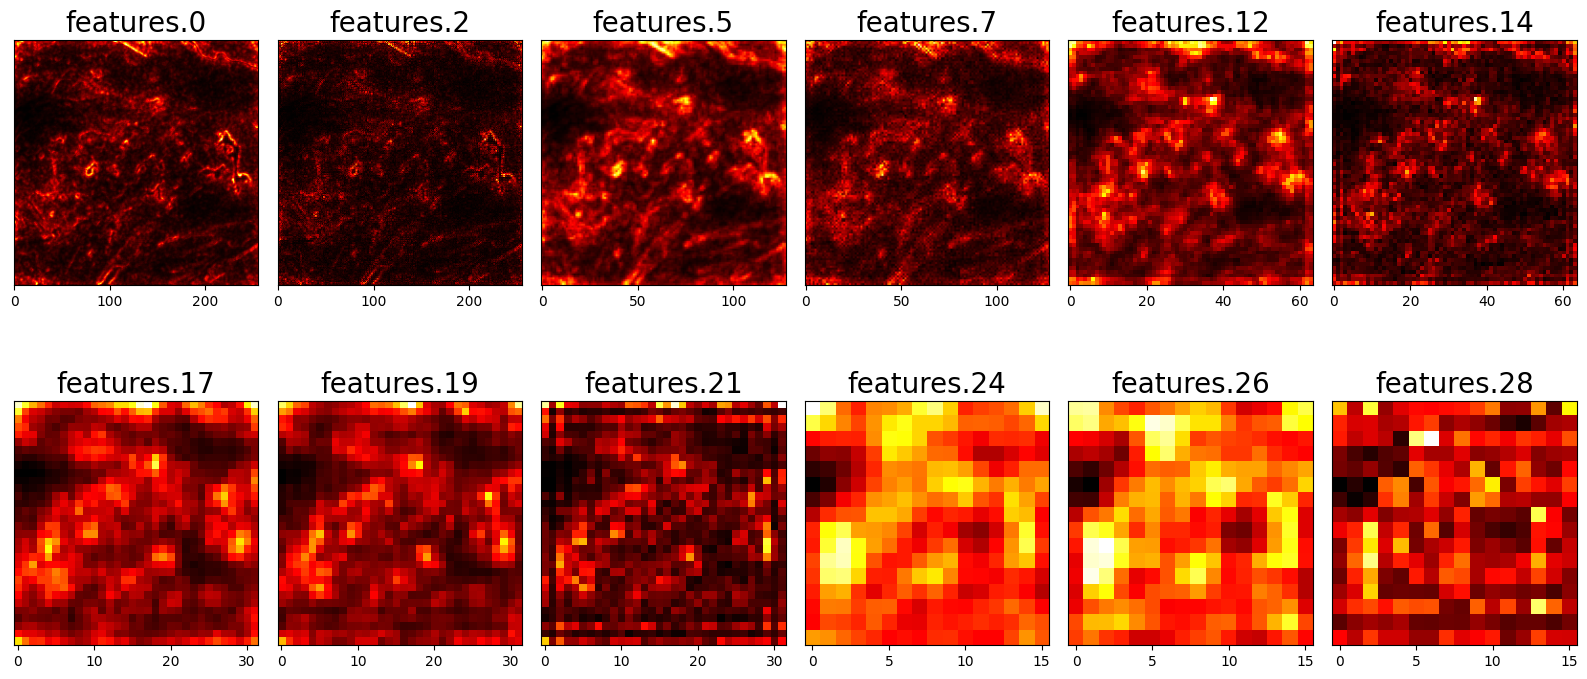

In [222]:

relevance_feature_map=generate_layer_heatmap(vgg16_rel,cmap="hot",symmetric=False,level=1)
recordlayer=['features.0', 'features.2', 'features.5', 'features.7', 'features.12', 'features.14', 'features.17', 'features.19', 'features.21', 'features.24', 'features.26', 'features.28']
visualize_layerheatmap(relevance_feature_map,title="",recordlayers=recordlayer,filepath=os.path.join(saved_path,"analysis/initvgg16.png"),rows=2,columns=6,figsize=(16,8),fontsize=20)

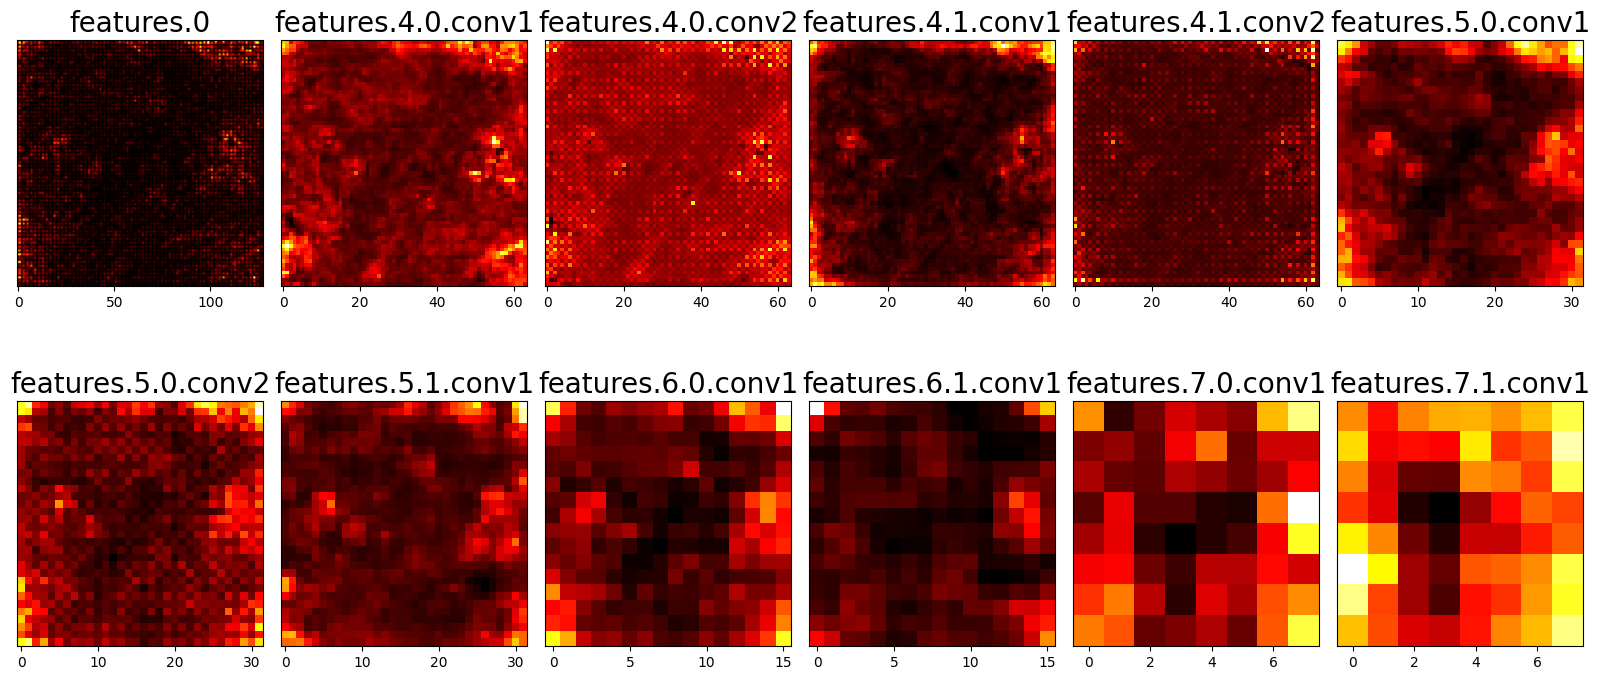

In [221]:

relevance_feature_map=generate_layer_heatmap(resent18_rel,cmap="hot",symmetric=False,level=1)
recordlayer=['features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.1.conv1', 'features.6.0.conv1', 'features.6.1.conv1', 'features.7.0.conv1', 'features.7.1.conv1']
columns=int(len(recordlayer)/2)
visualize_layerheatmap(relevance_feature_map,recordlayers=recordlayer,title="",filepath=os.path.join(saved_path,"analysis/initresnet18.png"),rows=2,columns=columns,figsize=(16,8),fontsize=20)

In [177]:
alexnet_data = alexnet_features["features.8"]['channelmean']
vgg16_data = vgg16_features["features.26"]['channelmean']
resnet18_data = resent18_features["features.7.1.conv1"]['channelmean']

In [180]:
print(resnet18_data)

[0.005252808332443237, 0.001241014921106398, 0.0026995204389095306, 0.005413481965661049, 0.00019118702039122581, 0.001453966018743813, 3.603277582442388e-05, 0.000475078821182251, 0.000871680851560086, 0.0010659547988325357, 0.0008915819926187396, 0.0019457001471892, 0.0007328212959691882, 0.00015942960453685373, 0.0006625421810895205, 0.001913588959723711, 0.0003249415894970298, 0.0011138127883896232, 0.0012435209937393665, 0.0013933421578258276, 0.0007147256983444095, -4.0806407923810184e-05, 6.45795080345124e-05, -0.0004902919754385948, 0.0005402379320003092, 0.00010467784886714071, 0.0004389399546198547, 0.0006954223499633372, 0.006363086402416229, 0.006946101784706116, 0.005278295837342739, 0.018223822116851807, 0.002812872175127268, 0.001108692493289709, 0.0001812172995414585, 0.0012706557754427195, 4.185977013548836e-05, 0.0015294923214241862, 0.0006730795721523464, 0.000127954306663014, 0.0005572395166382194, 9.462656453251839e-05, 0.00873444601893425, 0.00011422979878261685, 

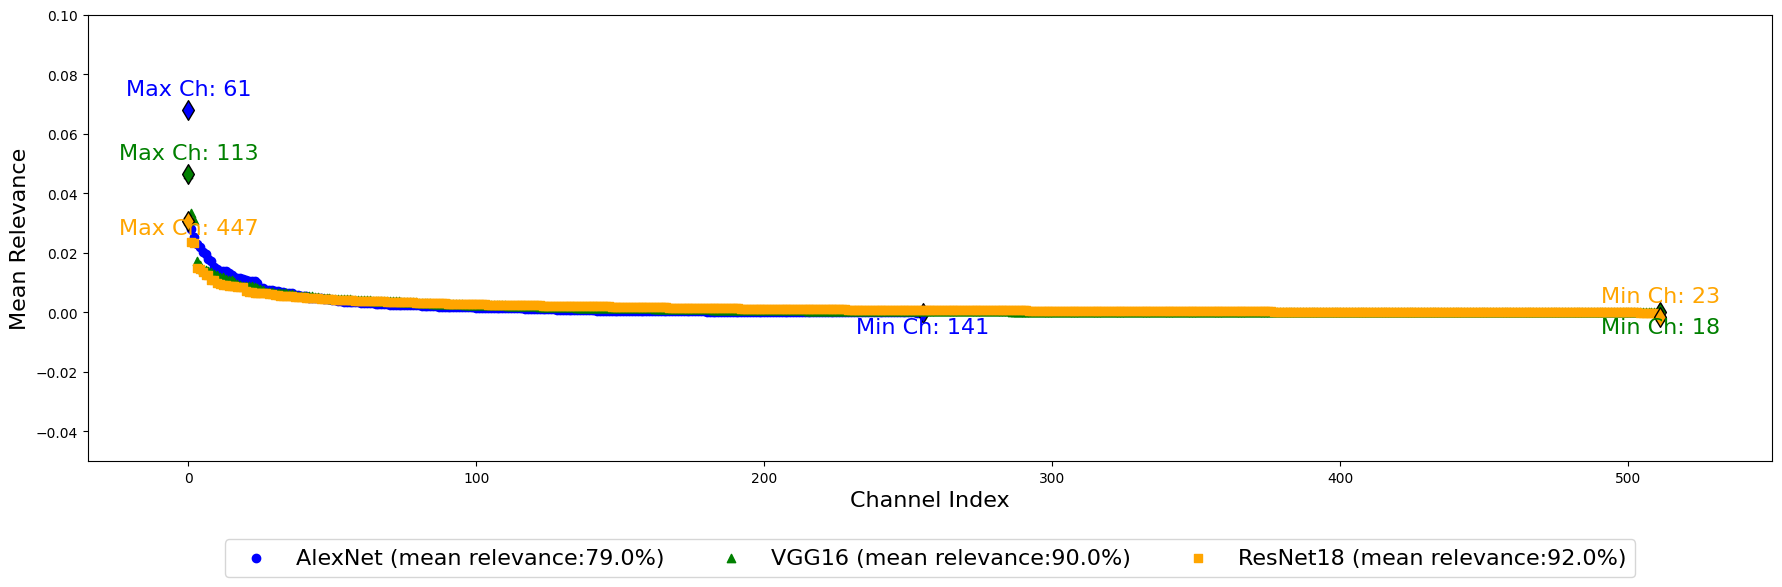

In [194]:
# Your data
alexnet_data = alexnet_features["features.8"]['channelmean']
vgg16_data = vgg16_features["features.26"]['channelmean']
resnet18_data = resent18_features["features.7.1.conv1"]['channelmean']
fontsize=16
# Plotting
figsize=(18,6)
plt.figure(figsize=figsize)
plot_and_annotate_max_min_index(alexnet_data, "AlexNet (mean relevance:"+str(round(alexnet_features["features.8"]['meanrel'],2)*100)+"%)", 'blue', 'o',fontsize=fontsize)
plot_and_annotate_max_min_index(vgg16_data, "VGG16 (mean relevance:"+str(round(vgg16_features["features.26"]['meanrel'],2)*100)+"%)", 'green', '^',fontsize=fontsize)
plot_and_annotate_max_min_index(resnet18_data, "ResNet18 (mean relevance:"+str(round(resent18_features["features.7.1.conv1"]['meanrel'],2)*100)+"%)", 'orange', 's',maxposition=(0,-10),minposition=(0,10),fontsize=fontsize)

#plt.title("Channel Mean Relevance Comparison Among Models (Max & Min Value Index Annotated)",fontsize=fontsize)
plt.xlabel("Channel Index",fontsize=fontsize)
plt.ylabel("Mean Relevance",fontsize=fontsize)
plt.ylim(-0.05,0.1)
plt.xlim(-35,550)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3,fontsize=fontsize)

plt.tight_layout()
plt.savefig(os.path.join(saved_path,"analysis/finallayerrelcomp.png"),dpi=600)
plt.show()

In [44]:
resent18_features["features.7.1.conv1"]['meanrel']

0.9299172163009644

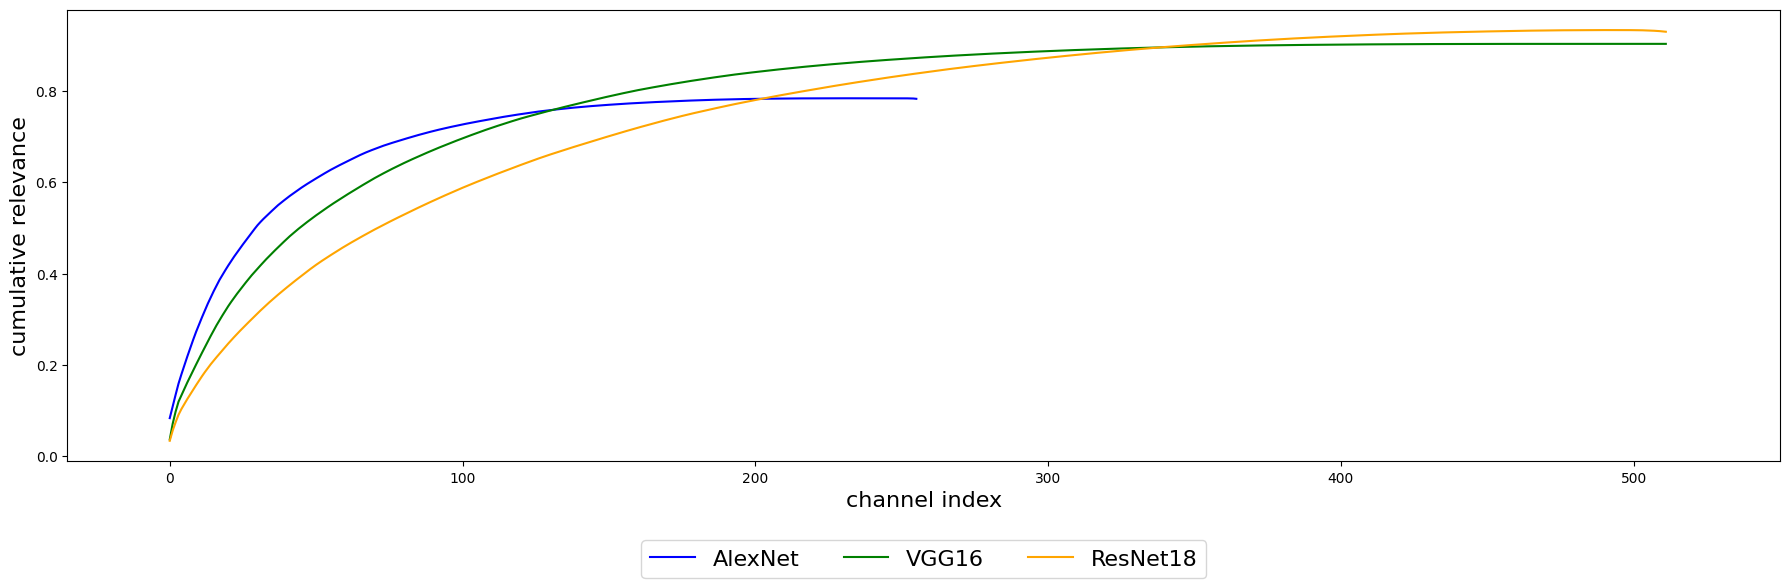

In [124]:
alexnet_data=sorted(alexnet_data,reverse=True)
vgg16_data=sorted(vgg16_data,reverse=True)
resnet18_data=sorted(resnet18_data,reverse=True)
alexcumulative_data = [sum(alexnet_data[:i+1]) for i in range(len(alexnet_data))]
vggcumulative_data = [sum(vgg16_data[:i+1]) for i in range(len(vgg16_data))]
resnetcumulative_data = [sum(resnet18_data[:i+1]) for i in range(len(resnet18_data))]
# Plotting the cumulative data
plt.figure(figsize=figsize)
plt.plot(alexcumulative_data, 'blue',label="AlexNet")
plt.plot(vggcumulative_data, 'green',label="VGG16")
plt.plot(resnetcumulative_data,'orange',label="ResNet18")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3,fontsize=fontsize)
plt.xlabel("channel index",size=fontsize)
plt.ylabel("cumulative relevance",size=fontsize)
plt.tight_layout()
plt.xlim(-35,550)
plt.savefig(os.path.join(saved_path,"analysis/cumfinallayerrelcomp.png"),dpi=600)

In [223]:
composite=["epsilon","epsilonplus","epsilonalphabeta"]
vgg16_eprel=get_info(load_dict(os.path.join(saved_path,models[1]+composite[0]+filename)))
vgg16_epplusrel=get_info(load_dict(os.path.join(saved_path,models[1]+composite[1]+filename)))
vgg16_abrel=get_info(load_dict(os.path.join(saved_path,models[1]+composite[2]+filename)))

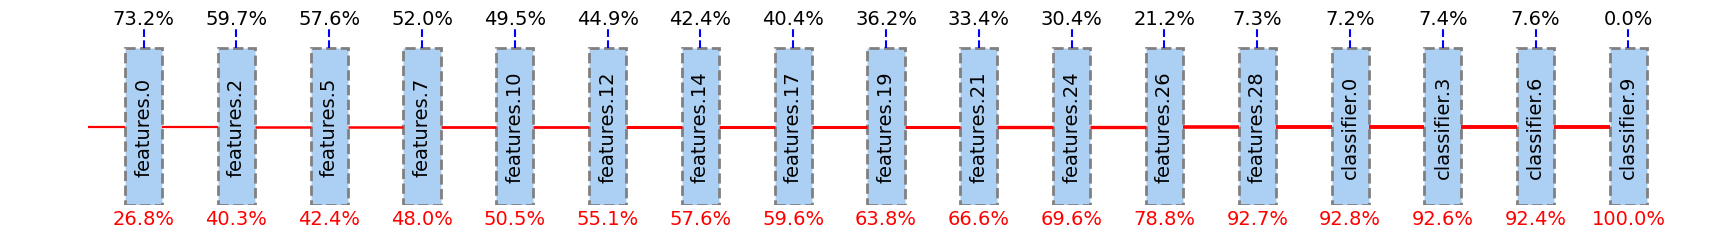

In [224]:
meanvalue={}
index=0
for i,value in vgg16_eprel.items():
    newparts = i.replace('downsample.0', 'down')
    meanvalue[newparts]=value["meanrel"]*100

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/vgg16epsilon_relevanceflow.png"))

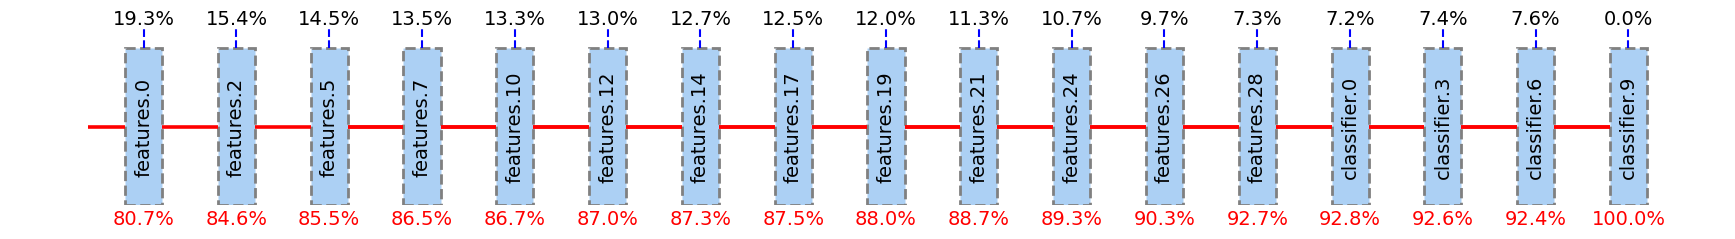

In [225]:
meanvalue={}
index=0
for i,value in vgg16_epplusrel.items():
    newparts = i.replace('downsample.0', 'down')
    meanvalue[newparts]=value["meanrel"]*100

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/vgg16epsilonplus_relevanceflow.png"))

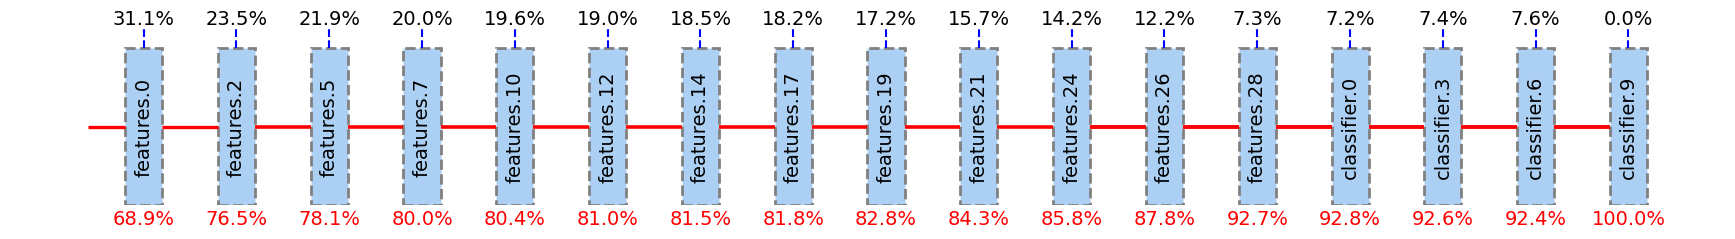

In [226]:
meanvalue={}
index=0
for i,value in vgg16_abrel.items():
    newparts = i.replace('downsample.0', 'down')
    meanvalue[newparts]=value["meanrel"]*100

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/vgg16alphabeta_relevanceflow.png"))

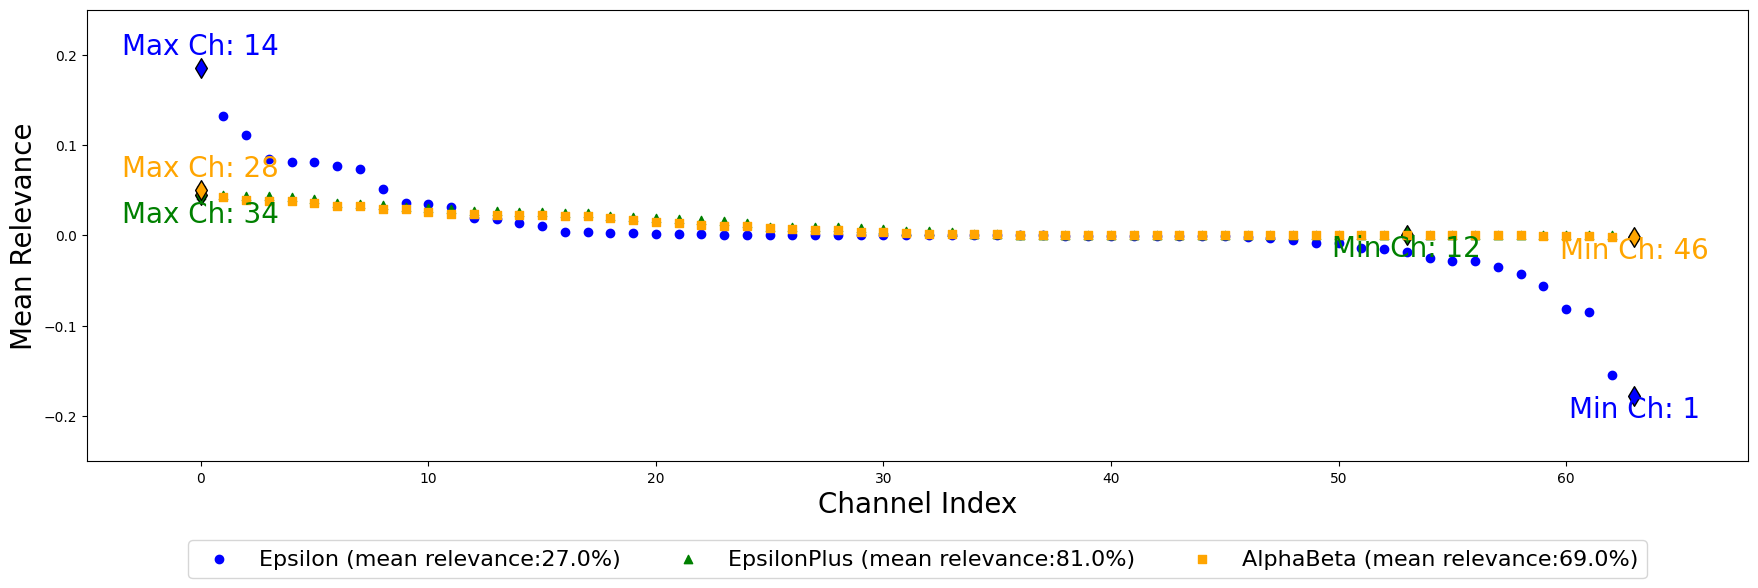

In [231]:

# Your data
vgg16_epreldata = vgg16_eprel["features.0"]['channelmean']
vgg16_epplusreldata = vgg16_epplusrel["features.0"]['channelmean']
vgg16_abreldata = vgg16_abrel["features.0"]['channelmean']
# Plotting
fontsize=20
plt.figure(figsize=figsize)
plot_and_annotate_max_min_index(vgg16_epreldata, "Epsilon (mean relevance:"+str(round(vgg16_eprel["features.0"]['meanrel'],2)*100)+"%)", 'blue', 'o',fontsize=fontsize)
plot_and_annotate_max_min_index(vgg16_epplusreldata, "EpsilonPlus (mean relevance:"+str(round(vgg16_epplusrel["features.0"]['meanrel'],2)*100)+"%)", 'green', '^',maxposition=(0,-20),fontsize=fontsize)
plot_and_annotate_max_min_index(vgg16_abreldata, "AlphaBeta (mean relevance:"+str(round(vgg16_abrel["features.0"]['meanrel'],2)*100)+"%)", 'orange', 's',fontsize=fontsize)

#plt.title("Channel Mean Relevance Comparison Among Propagation Rules (Max & Min Value Index Annotated)",fontsize=fontsize)
plt.xlabel("Channel Index",fontsize=fontsize)
plt.ylabel("Mean Relevance",fontsize=fontsize)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3,fontsize=fontsize-4)
plt.ylim(-0.25,0.25)
plt.xlim(-5,68)
plt.tight_layout()
plt.savefig(os.path.join(saved_path,"analysis/intlayercomp.png"),dpi=600)
plt.show()

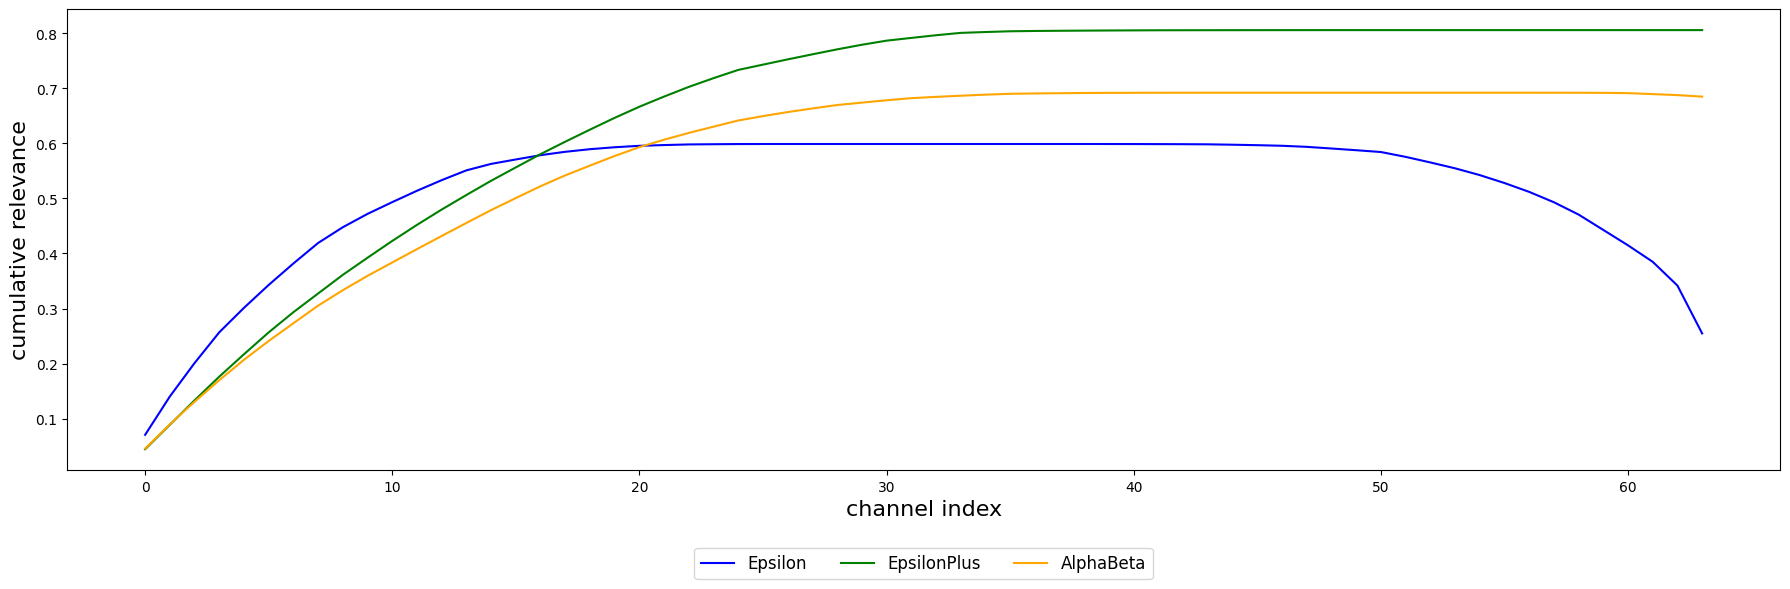

In [126]:
alexnet_data=sorted(vgg16_epreldata,reverse=True)
vgg16_data=sorted(vgg16_epplusreldata,reverse=True)
resnet18_data=sorted(vgg16_abreldata,reverse=True)
alexcumulative_data = [sum(alexnet_data[:i+1]) for i in range(len(alexnet_data))]
vggcumulative_data = [sum(vgg16_data[:i+1]) for i in range(len(vgg16_data))]
resnetcumulative_data = [sum(resnet18_data[:i+1]) for i in range(len(resnet18_data))]
# Plotting the cumulative data
plt.figure(figsize=figsize)
plt.plot(alexcumulative_data, 'blue',label="Epsilon")
plt.plot(vggcumulative_data, 'green',label="EpsilonPlus")
plt.plot(resnetcumulative_data,'orange',label="AlphaBeta")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3,fontsize=fontsize-4)

plt.xlabel("channel index",size=fontsize)
plt.ylabel("cumulative relevance",size=fontsize)
plt.tight_layout()
plt.savefig(os.path.join(saved_path,"analysis/cumintlayercomp.png"),dpi=600)

In [129]:
resnet18_pretrained=get_info(load_dict(os.path.join(saved_path,models[-1]+"pretrained"+filename)))
resnet18_trained=get_info(load_dict(os.path.join(saved_path,models[-1]+"trained"+filename)))

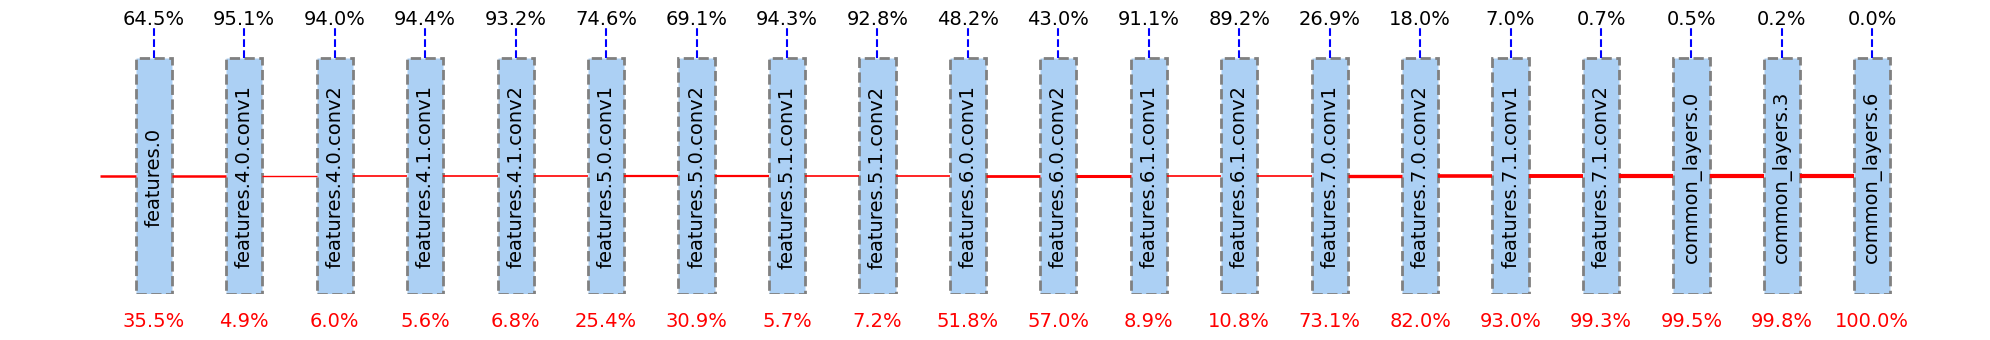

In [146]:
meanvalue={}
index=0
for i,value in resnet18_pretrained.items():
    newparts = i.replace('downsample.0', 'down')
    if 'down' not in newparts:
        meanvalue[newparts]=value["meanrel"]*100

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/resnetpretrained_relevanceflow.png"),figheight=3.5)

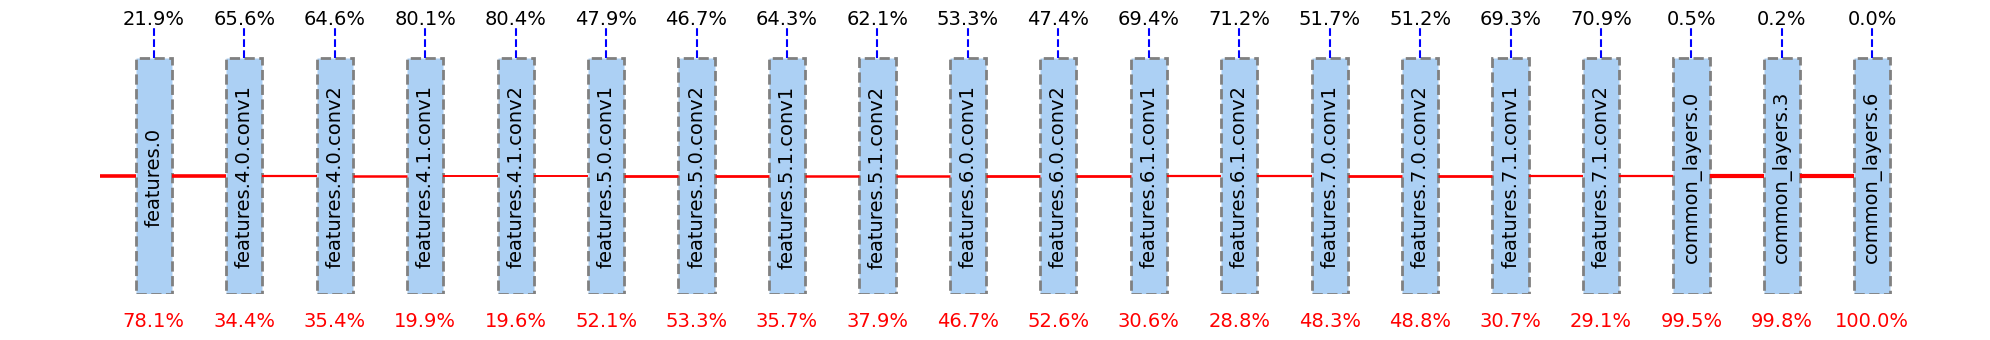

In [147]:
meanvalue={}
index=0
for i,value in resnet18_trained.items():
    newparts = i.replace('downsample.0', 'down')
    if 'down' not in newparts:
        meanvalue[newparts]=value["meanrel"]*100

create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/resnettrained_relevanceflow.png"),figheight=3.5)

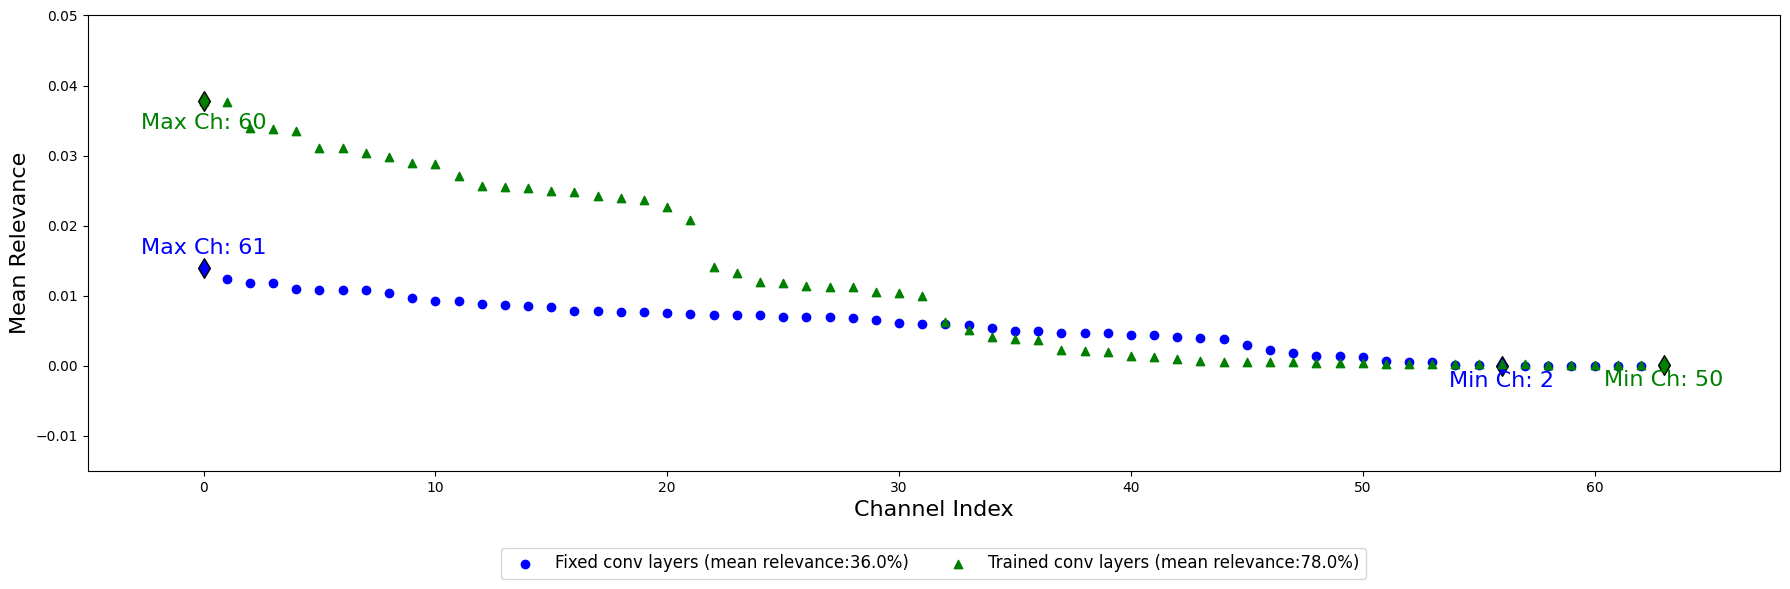

In [144]:
alexnet_ptreldata = resnet18_pretrained["features.0"]['channelmean']
alexnet_trreldata = resnet18_trained["features.0"]['channelmean']

# Plotting
plt.figure(figsize=figsize)
plot_and_annotate_max_min_index(alexnet_ptreldata, "Fixed conv layers (mean relevance:"+str(round(resnet18_pretrained["features.0"]['meanrel'],2)*100)+"%)", 'blue', 'o',fontsize=fontsize)
plot_and_annotate_max_min_index(alexnet_trreldata, "Trained conv layers (mean relevance:"+str(round(resnet18_trained["features.0"]['meanrel'],2)*100)+"%)", 'green', '^',maxposition=(0,-20),fontsize=fontsize)

#plt.title("Channel Mean Relevance Comparison between Trained and Pretrained Model (Max & Min Value Index Annotated)",fontsize=fontsize)
plt.xlabel("Channel Index",fontsize=fontsize)
plt.ylabel("Mean Relevance",fontsize=fontsize)
plt.ylim(-0.015,0.05)
plt.xlim(-5,68)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=False, ncol=3,fontsize=fontsize-4)
plt.tight_layout()
plt.savefig(os.path.join(saved_path,"analysis/resnetfinallayer.png"),dpi=600)
plt.show()

In [237]:
alexnet16_pretrained=load_dict(os.path.join(saved_path,models[-1]+"trained"+filename))
relevance_feature_map=generate_layer_heatmap(alexnet16_pretrained,cmap="france",symmetric=True,level=2)

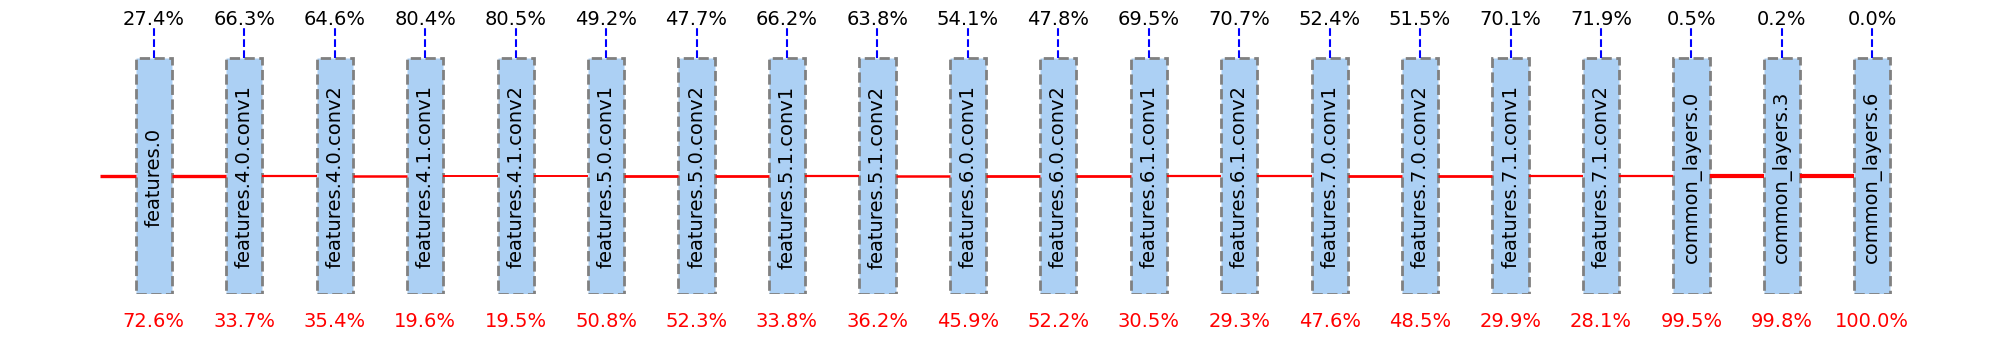

In [240]:
meanvalue={}
index=0
x=get_info(alexnet16_pretrained)
for i,value in x.items():
    newparts = i.replace('downsample.0', 'down')
    if 'down' not in newparts:
        meanvalue[newparts]=value["meanrel"]*100
meanvalue['common_layers.3']=99.8
meanvalue['common_layers.0']=99.5
create_bar_chart(meanvalue,os.path.join(saved_path,"analysis/resnettrained_relevanceflow.png"),figheight=3.5)

In [241]:
recordlayer=resnet18_trained.keys()

In [242]:
recordlayer=['features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.1.conv1', 'features.5.1.conv2', 'features.6.0.conv1', 'features.6.0.conv2', 'features.6.1.conv1', 'features.6.1.conv2', 'features.7.0.conv1', 'features.7.0.conv2', 'features.7.1.conv1']

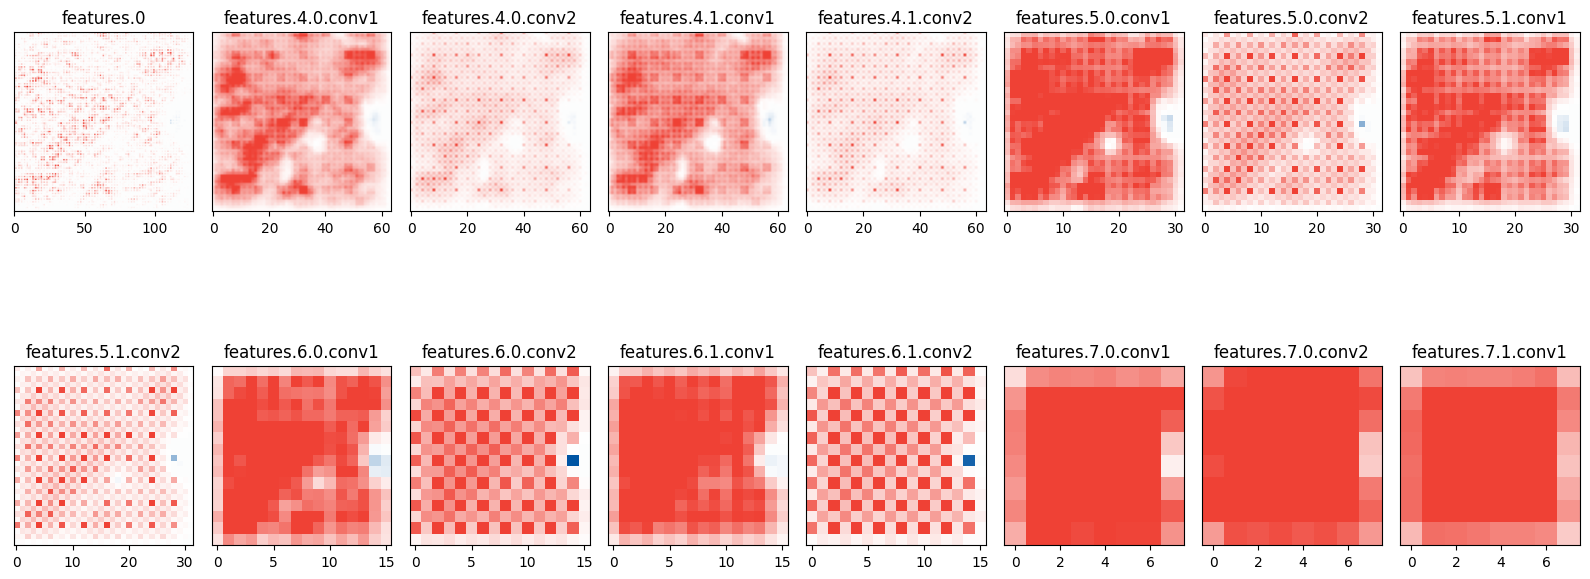

In [244]:
visualize_layerheatmap(relevance_feature_map,recordlayers=recordlayer,title="",filepath=os.path.join(saved_path,"analysis/trainedresnet18layermap.png"),rows=2,columns=8,figsize=(16,8),fontsize=12)

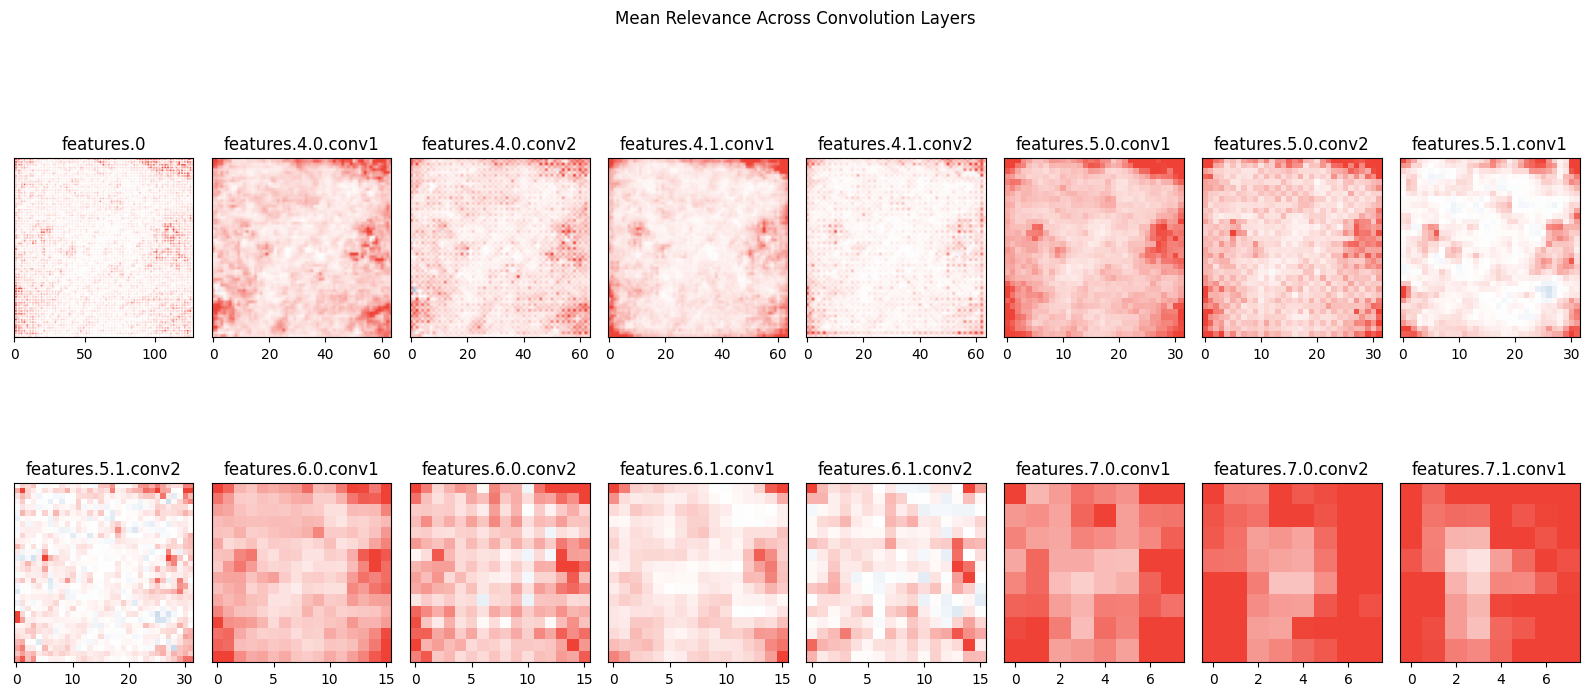

In [245]:
alexnet16_pretrained=load_dict(os.path.join(saved_path,models[-1]+"pretrained"+filename))
relevance_feature_map=generate_layer_heatmap(alexnet16_pretrained,cmap="france",symmetric=True,level=2)
visualize_layerheatmap(relevance_feature_map,recordlayers=recordlayer,filepath=os.path.join(saved_path,"analysis/pretrainedresnet18layermap.png"),rows=2,columns=8,figsize=(16,8),fontsize=12)